# A Walkthrough of *Exact Stochastic Simulation of Coupled Chemical Reactions* By Danlel T. Gillespie

## Part 3 - Application of the Gillespie Algorithm

### Learning Goals of Part 3

In this seciton the Gillespie algorithm will be imported as a Python module. We will then move on to some other examples that Gillespie covered in his original paper.

In [6]:
%load_ext autoreload
%autoreload 2

In [8]:
# import the same packages. 
# It is better form to do these on individual lines.
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Self-Equilibriating Reactions

Given by the equations:

$$ \bar{X} + Y \xrightarrow{c_1} 2Y $$

$$ 2Y \xrightarrow{c_2} Z $$

Where $\bar{X}$ is held constant, effectively representing an inexhaustible supply.

In [3]:
X_self_equib = [3000]

c_self_equib = [5., 0.005]

xc_self_equib = {1: lambda j: [j[0] + 1],
                 2: lambda j: [j[0] - 2]}

hf_self_equib = {1: lambda k: k[0],
                 2: lambda k: k[0] * (k[0] -1) / 2.}

In [54]:
from gillespie_algorithm import Gillespie as gsa

In [55]:
species = {1: 3000}

rates = {1: 5.0, 2: 0.005}

# These are functions that modify the count of tracked species
# based on which reaction occurs. That is the c rate value that
# corresponds to a stoichiometric reaction. These lambda functions
# take the species dictionary as their input argument.
spcies_change = {
    1: lambda l: l[1] + 1,
    2: lambda l: l[1] - 2,
}

avail_rxns = {
    1: lambda l: l[1],
    2: lambda l: l[1] * ( l[1] - 1 ) / 2, 
}

In [56]:
self_equib = gsa(species, rates, spcies_change, avail_rxns, 5, 10000).simulate()

{1: <function <lambda> at 0x7f3fd381daa0>, 2: <function <lambda> at 0x7f3fd381d848>}
('av list', [15000.0, 22492.5])
{1: <function <lambda> at 0x7f3fd381daa0>, 2: <function <lambda> at 0x7f3fd381d848>}


TypeError: 'int' object has no attribute '__getitem__'

In [27]:
for v in avail_rxns:
    yield avail_rxns[v](species) * rates[v]

SyntaxError: 'yield' outside function (<ipython-input-27-7db8ac082ac8>, line 2)

In [30]:
self_equib = gsa(X_self_equib, c_self_equib, xc_self_equib, hf_self_equib, 5, 10000).simulate()

NameError: name 'X_self_equib' is not defined

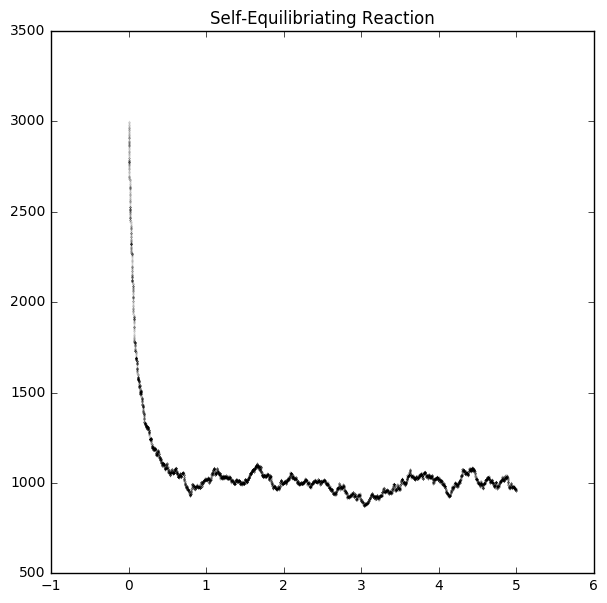

In [5]:
plt.figure(1, figsize=(7,7))
plt.title('Self-Equilibriating Reaction')
se_t, se_x = zip(self_equib)
plt.scatter(se_t, se_x, marker='.', s=0.1, alpha=0.1, color='k')
plt.show()

### Discussion

Gillespie mentions in his paper that the master equation for the above reaction has two steady-state solutions.

The reaction rate equation:

$$
\frac{dY}{dt} = c_1 X Y - 2(c_2 / 2)Y^2
$$

Steady-state solutions:

$$ Y_s = 0 $$

$$ Y_s = c_1 X / c_2 $$

Since the critisism Gillespie responds to in this section appears to not have even survived the duration of his manuscript preparation, we won't go into detail here. Rather, let us check that the proposed steady-state solutions above (provided for us, we are simply trusting anothers math) are the same as what we observe in this algorithm.

For the case modeled above we have: $c_1X = 5$ and $c_2 = 0.005$

Which gives $ Y_s = 1000 $

So let's plot this line at Y = 1000 with our above simulation data.

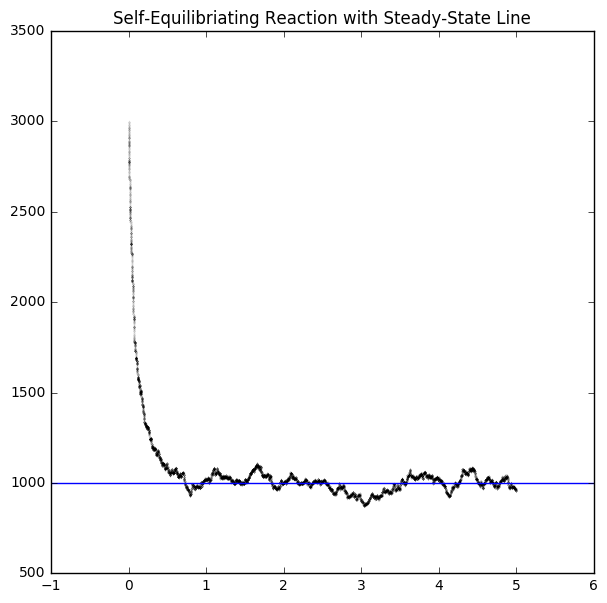

In [6]:
plt.figure(2, figsize=(7,7))
plt.title('Self-Equilibriating Reaction with Steady-State Line')
plt.scatter(se_t, se_x, marker='.', s=0.1, alpha=0.1, color='k')
plt.axhline(y=1000)
plt.show()

### Series of self-equilibriating reactions


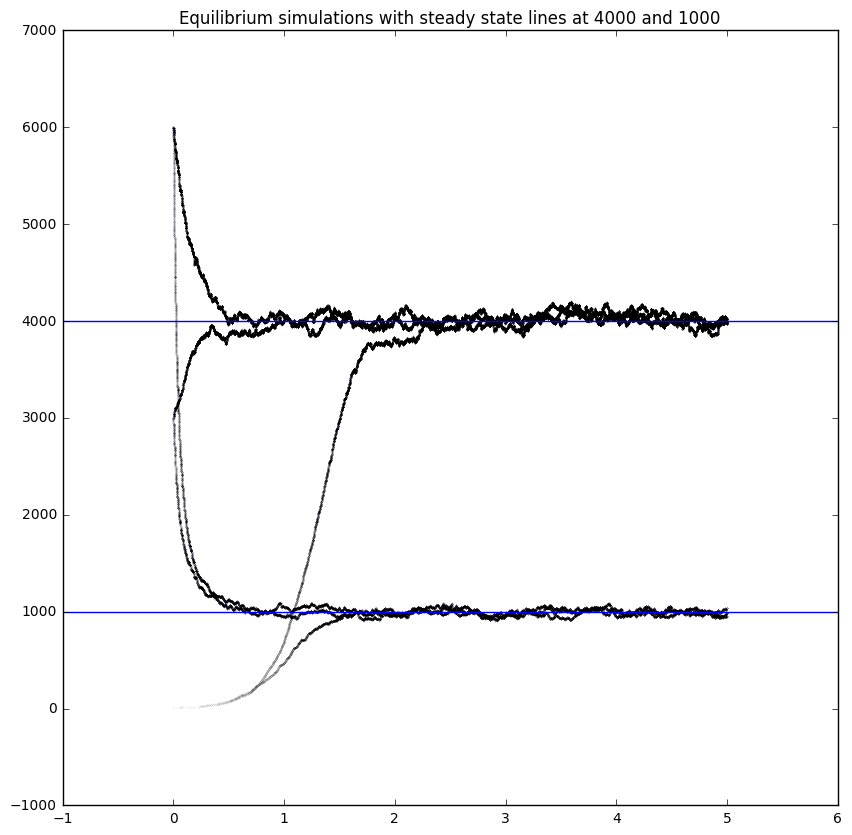

In [7]:
X_eq_multi = [10, 3000, 6000]
c_eq_multi = [[5, 0.005],[5,0.00125]]

fig, ax = plt.subplots(1, 1, figsize=(10,10))


plt.title("Equilibrium simulations with steady state lines at 4000 and 1000")

ax.axhline(y=1000)
ax.axhline(y=4000)
                           
for i in c_eq_multi:
    for j in X_eq_multi:
        t, x = gsa([j], i, xc_self_equib, hf_self_equib, 5, 10000).simulate()
        ax.scatter(t, x, marker=".", s=.1, alpha=0.1)
        
plt.show()